In [6]:
import cv2
import os
import numpy as np

# A class for image bluring
class ImageBlur:
    def __init__(self, input_file):
        self.input_file = input_file
        if not os.path.exists(self.input_file):
            raise ValueError(f"Input file '{self.input_file}' does not exist.")
        self.image = cv2.imread(self.input_file)
        if self.image is None:
            raise ValueError(f"Failed to load input file '{self.input_file}'.")
        
    def apply_gaussian_blur(self, kernel_size=(5, 5), sigma_x=0):
        if self.image is not None:
            self.image = cv2.GaussianBlur(self.image, kernel_size, sigma_x)
        
    def apply_box_blur(self, kernel_size=(5, 5)):
        if self.image is not None:
            self.image = cv2.blur(self.image, kernel_size)
        
    def save_blurred_image(self, output_file):
        if self.image is not None:
            cv2.imwrite(output_file, self.image)
    
    def show_blurred_image(self):
        if self.image is not None:
            cv2.imshow('Blurred Image', self.image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()


In [3]:
path_to_file = ".\images\Samoyed-dog.webp"

blur = ImageBlur(path_to_file)
blur.apply_gaussian_blur(kernel_size=(15, 15), sigma_x=0)
blur.save_blurred_image('blured_image.jpg')
blur.show_blurred_image()

In [2]:
# A class for image enchanting
class ImageEnhancement:
    def __init__(self, input_file):
        self.input_file = input_file
        if not os.path.exists(self.input_file):
            raise ValueError(f"Input file '{self.input_file}' does not exist.")
        self.image = cv2.imread(self.input_file)
        if self.image is None:
            raise ValueError(f"Failed to load input file '{self.input_file}'.")
        
    def apply_gamma_correction(self, gamma=1.0):
        if self.image is not None:
            self.image = cv2.pow(self.image / 255.0, gamma)
            self.image = cv2.normalize(self.image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    
    def apply_various_linear_filter(self):
        pass

    def apply_various_nonlinear_filter(self):
        pass

    def apply_fourier_frequency_domain_methods(self):
        pass

    def apply_wavelet_frequency_domain_methods(self):
        pass
        
    def show_image(self, window_name='Image'):
        if self.image is not None:
            cv2.imshow(window_name, self.image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            
    def save_image(self, output_file):
        if self.image is not None:
            cv2.imwrite(output_file, self.image)

In [5]:
blured_image_path = "./blured_image.jpg"

enhance = ImageEnhancement(blured_image_path)
enhance.apply_gamma_correction(gamma=2)
enhance.show_image()
enhance.save_image('enhanced_image.jpg')

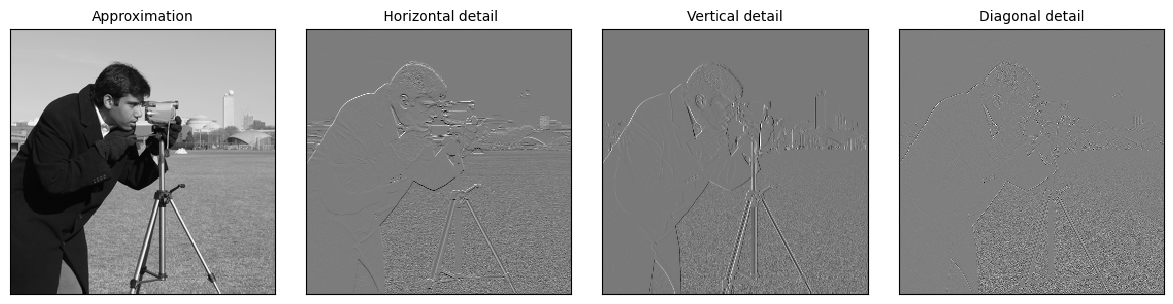

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

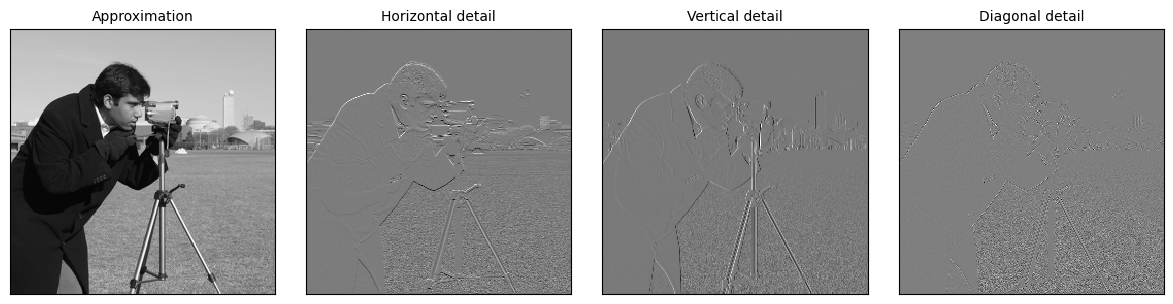

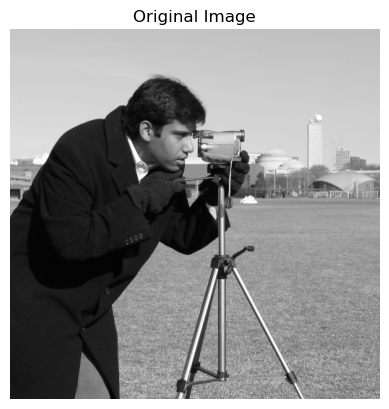

In [1]:
import pywt
import pywt.data
import matplotlib.pyplot as plt

class WaveletTransform:
    def __init__(self):
        self.original = None
        self.coeffs2 = None

    def load_image(self):
        """Load the original image."""
        self.original = pywt.data.camera()

    def perform_wavelet_transform(self):
        """Perform the wavelet transform of the image."""
        if self.original is not None:
            self.coeffs2 = pywt.dwt2(self.original, 'bior1.3')

    def show_wavelet_coeffs(self):
        """Show the approximation and details coefficients."""
        if self.coeffs2 is not None:
            LL, (LH, HL, HH) = self.coeffs2
            titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']
            fig = plt.figure(figsize=(12, 3))
            for i, a in enumerate([LL, LH, HL, HH]):
                ax = fig.add_subplot(1, 4, i + 1)
                ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
                ax.set_title(titles[i], fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])

            fig.tight_layout()
            plt.show()

    def show_image(self):
        """Show the original image."""
        if self.original is not None:
            plt.imshow(self.original, cmap=plt.cm.gray)
            plt.title('Original Image')
            plt.axis('off')
            plt.show()

    def save_image(self, output_file):
        """Save the original image to the specified output file."""
        if self.original is not None:
            plt.imsave(output_file, self.original, cmap=plt.cm.gray)

wavelet_transform = WaveletTransform()
wavelet_transform.load_image()
wavelet_transform.perform_wavelet_transform()
wavelet_transform.show_wavelet_coeffs()
wavelet_transform.show_image()
wavelet_transform.save_image('output_image.jpg')

In [ ]:
    def fourier_transform(self, method='dft'):
        if self.image is not None:
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
            if method == 'dft':
                transformed_image = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
                shifted_image = np.fft.fftshift(transformed_image)
                magnitude_spectrum = 20 * np.log(cv2.magnitude(shifted_image[:, :, 0], shifted_image[:, :, 1]))
                self.image = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
            elif method == 'sft':
                transformed_image = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
                fourier_shift = np.fft.fftshift(fourier)
                transformed_image = cv2.sftd(gray_image)
                self.image = cv2.normalize(transformed_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
            else:
                raise ValueError(f"Invalid method '{method}' specified. Supported methods are 'dft' and 'sft'.")


In [ ]:
class FourierTransform:
    def __init__(self, input_file):
        self.input_file = input_file
        if not os.path.exists(self.input_file):
            raise ValueError(f"Input file '{self.input_file}' does not exist.")
        self.image = cv2.imread(self.input_file, cv2.COLOR_BGR2GRAY)
        if self.image is None:
            raise ValueError(f"Failed to load input file '{self.input_file}'.")
        self.magnitude = None

    def set_magnitude(self):
        if self.image is not None:
            fourier_transformed = np.fft.fft2(self.image)
            self.magnitude = np.asarray(20 * np.log(np.abs(fourier_transformed)))

    def show_image(self, window_name='Fourier'):
        if self.image is not None:
            cv2.imshow(window_name, self.image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

fourier = FourierTransform("./images/Samoyed-dog.webp")
fourier.set_magnitude()
fourier.show_image()


KeyboardInterrupt: 